In [1]:
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

import math  
import numpy as np
import pandas as pd

import missingno as msno

In [4]:
df = pd.read_csv('datasets/world_development_indicators.csv')
df.head()

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Argentina,ARG,People with basic handwashing facilities inclu...,SH.STA.HYGN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,People using at least basic sanitation service...,SH.STA.BASS.ZS,9.262178e+01,9.318250e+01,9.374175e+01,9.416756e+01,9.420105e+01,9.423485e+01,9.425851e+01,NaN,NaN,NaN
2,Argentina,ARG,People using safely managed sanitation service...,SH.STA.SMSS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,"International tourism, number of arrivals",ST.INT.ARVL,6.800000e+06,6.703000e+06,6.497000e+06,6.510000e+06,7.165000e+06,6.816000e+06,6.668000e+06,6711000.0,6942000.0,NaN
4,Argentina,ARG,"International tourism, number of departures",ST.INT.DPRT,5.307000e+06,6.686000e+06,7.266000e+06,6.746000e+06,6.517000e+06,7.807000e+06,1.041700e+07,12213000.0,11130000.0,NaN


In [5]:
len(df['Country Name'].unique())

267

In [6]:
df.replace('United States', 'US', inplace = True)
df.replace('Korea, Rep.', 'Korea, South', inplace = True)
df.replace('Egypt, Arab Rep.', 'Egypt', inplace = True)
df.replace('Bahamas, The', 'Bahamas', inplace = True)
df.replace('Myanmar', 'Burma', inplace = True)
df.replace('Russian Federation', 'Russia', inplace = True)
df.replace('Iran, Islamic Rep.', 'Iran', inplace = True)
df.replace('Venezuela, RB', 'Venezuela', inplace = True)
df.replace('Czech Republic', 'Czechia', inplace = True)
df.replace('Syrian Arab Republic', 'Syria', inplace = True)
df.replace('St. Kitts and Nevis', 'Saint Kitts and Nevis', inplace = True)
df.replace('St. Lucia', 'Saint Lucia', inplace = True)
df.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines', inplace = True)
df.replace('Kyrgyz Republic', 'Kyrgyzstan', inplace = True)
df.replace('Lao PDR', 'Laos', inplace = True)
df.replace('Slovak Republic', 'Slovakia', inplace = True)
df.replace('Gambia, The', 'Gambia', inplace = True)
df.replace('Congo, Dem. Rep.', 'Congo (Kinshasa)', inplace = True)
df.replace('Congo, Rep.', 'Congo (Brazzaville)', inplace = True)
df.replace('Brunei Darussalam', 'Brunei', inplace = True)


In [7]:
df_covid_con = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_covid_fat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
df_covid_con = df_covid_con.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid_fat = df_covid_fat.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid_rec = df_covid_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

df_covid_con.tail()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
178,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,163,174,188,203,212,218,233,237,240,241
179,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,...,91,98,109,116,119,134,161,194,217,237
180,Western Sahara,24.2155,-12.8858,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
181,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,22,28,29,35,35,36,39,39,39,39
182,Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,0,...,5,7,7,7,8,8,9,9,9,9


In [9]:
dates = df_covid_con.columns[4:]
df_covid_con = df_covid_con.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')
df_covid_fat = df_covid_fat.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')
df_covid_rec = df_covid_rec.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')


In [10]:
df_covid_rec.head()

,Country/Region,Lat,Long,Date,Recovered
0,Afghanistan,33.0000,65.0000,1/23/20,0
1,Albania,41.1533,20.1683,1/23/20,0
2,Algeria,28.0339,1.6596,1/23/20,0
3,Andorra,42.5063,1.5218,1/23/20,0
4,Angola,-11.2027,17.8739,1/23/20,0


In [11]:
df_covid_con['Date'] =pd.to_datetime(df_covid_con.Date)
df_covid_fat['Date'] =pd.to_datetime(df_covid_fat.Date)
df_covid_rec['Date'] =pd.to_datetime(df_covid_rec.Date)

In [12]:
# df_covid = df_covid.groupby('Date')['Confirmed'].sum().reset_index()

In [13]:
df_covid_rec.tail()

,Country/Region,Lat,Long,Date,Recovered
13537,Vietnam,16.0000,108.0000,2020-04-05,90
13538,West Bank and Gaza,31.9522,35.2332,2020-04-05,25
13539,Western Sahara,24.2155,-12.8858,2020-04-05,0
13540,Zambia,-15.4167,28.2833,2020-04-05,3
13541,Zimbabwe,-20.0000,30.0000,2020-04-05,0


In [14]:
df_covid = df_covid_con.merge(df_covid_fat, 
               on=['Country/Region', 'Lat', 'Long', 'Date']).merge(df_covid_rec, 
                                                                   on=['Country/Region', 'Lat', 'Long', 'Date'])

In [15]:
df_covid.tail()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
13167,Vietnam,16.0000,108.0000,2020-04-05,241,0,90
13168,West Bank and Gaza,31.9522,35.2332,2020-04-05,237,1,25
13169,Western Sahara,24.2155,-12.8858,2020-04-05,4,0,0
13170,Zambia,-15.4167,28.2833,2020-04-05,39,1,3
13171,Zimbabwe,-20.0000,30.0000,2020-04-05,9,1,0


In [16]:
common = set(df_covid['Country/Region'].unique()).intersection(set(df['Country Name'].unique()))

In [17]:
set(df_covid['Country/Region'].unique()) - common

{'Diamond Princess', 'Holy See', 'MS Zaandam', 'Taiwan*', 'Western Sahara'}

In [18]:
# set(df['Country Name'].unique()) - common

In [19]:
lol = []
cols = []
for country in common:
    temp = df[df['Country Name'] == country].reset_index()
    temp_vals = temp[df.columns[4:]]
    temp['Latest'] = temp_vals.ffill(axis=1).iloc[:, -1]
    t= temp[['Country Name', 'Series Name', 'Latest']].pivot(index='Country Name', 
                                                          columns='Series Name', values='Latest').reset_index()
    cols = list(t.columns)
    lol.append(list(t.loc[0]))
    

In [20]:
df_wdi = pd.DataFrame(lol, columns = cols)
df_wdi.head()

,Country Name,"Birth rate, crude (per 1,000 people)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by non-communicable diseases (% of total)","Current health expenditure per capita, PPP (current international $)","Death rate, crude (per 1,000 people)","Hospital beds (per 1,000 people)","International tourism, number of arrivals","International tourism, number of departures","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Nurses and midwives (per 1,000 people)",People using at least basic sanitation services (% of population),People using safely managed sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),"Population, total","Smoking prevalence, total (ages 15+)"
0,Guatemala,24.912,25.1,59.2,462.405855,4.762,0.6,1781000.0,1227000.0,73.810000,110.078,209.134,0.9470,65.063135,NaN,76.665504,4.812073,160.953779,17247807.0,NaN
1,Bulgaria,9.000,2.2,95.2,1577.942762,15.500,6.8,9273000.0,6699000.0,74.812195,88.309,197.081,5.3029,86.003698,64.413712,NaN,21.021914,64.703537,7024216.0,37.0
2,Cameroon,35.900,53.9,35.2,169.288821,9.501,1.3,1081000.0,NaN,58.511000,317.369,340.930,0.9337,39.075550,NaN,9.402066,2.728877,53.343989,25216237.0,NaN
3,Saint Vincent and the Grenadines,14.403,13.4,81.0,409.140058,9.162,2.6,80000.0,NaN,72.300000,125.864,179.467,2.5801,87.184345,NaN,NaN,9.589787,282.589744,110210.0,NaN
4,Honduras,21.859,14.0,66.5,400.336410,4.428,0.7,851000.0,654000.0,74.898000,117.401,170.217,0.8815,81.251263,NaN,84.169253,4.690618,85.687032,9587522.0,2.0


In [21]:
df_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
Country Name                                                                                             173 non-null object
Birth rate, crude (per 1,000 people)                                                                     173 non-null float64
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)    165 non-null float64
Cause of death, by non-communicable diseases (% of total)                                                165 non-null float64
Current health expenditure per capita, PPP (current international $)                                     168 non-null float64
Death rate, crude (per 1,000 people)                                                                     173 non-null float64
Hospital beds (per 1,000 people)                                                                         152 non-null float64
International 

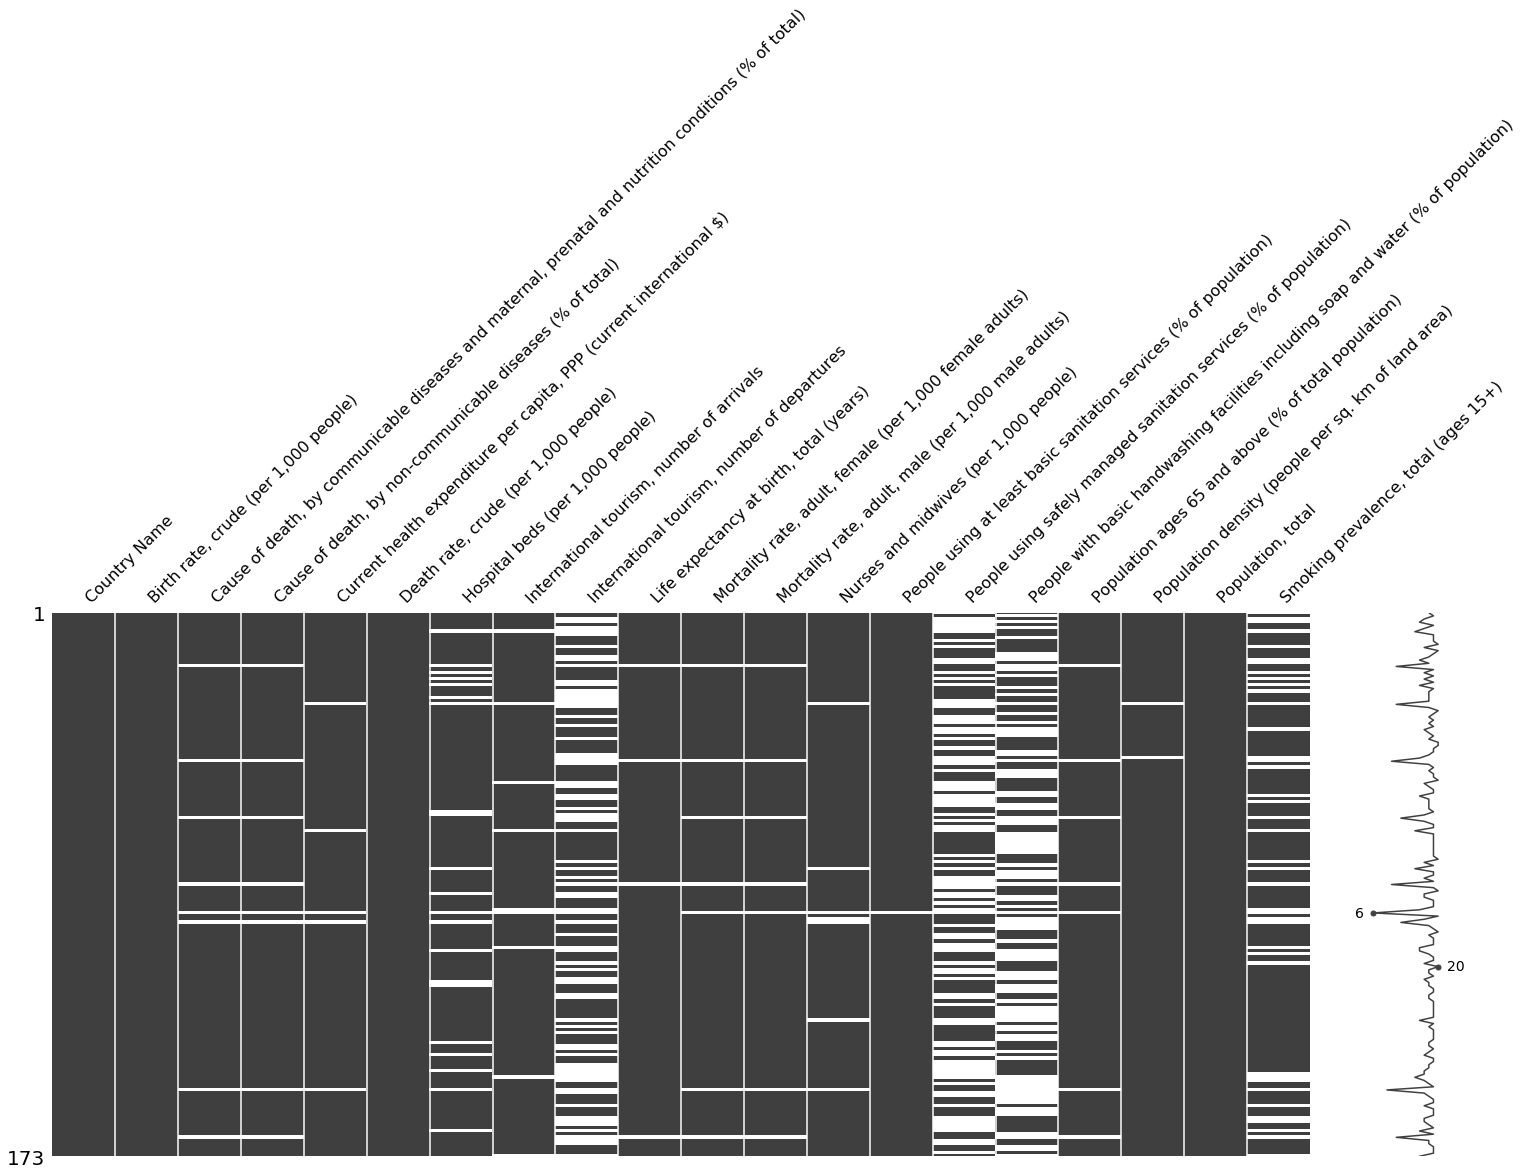

In [22]:
msno.matrix(df_wdi)

In [23]:
math.ceil(len(df_wdi)*0.3)

52

In [24]:
df_wdi.isnull().sum().sort_values()[::-1]

People with basic handwashing facilities including soap and water (% of population)                      91
People using safely managed sanitation services (% of population)                                        87
International tourism, number of departures                                                              74
Smoking prevalence, total (ages 15+)                                                                     40
Hospital beds (per 1,000 people)                                                                         21
International tourism, number of arrivals                                                                 9
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)     8
Cause of death, by non-communicable diseases (% of total)                                                 8
Population ages 65 and above (% of total population)                                                      7
Nurses and midwives (per 1,0

In [25]:
df_wdi.columns[df_wdi.isnull().sum() < math.ceil(len(df_wdi)*0.3)]

Index(['Country Name', 'Birth rate, crude (per 1,000 people)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Cause of death, by non-communicable diseases (% of total)',
       'Current health expenditure per capita, PPP (current international $)',
       'Death rate, crude (per 1,000 people)',
       'Hospital beds (per 1,000 people)',
       'International tourism, number of arrivals',
       'Life expectancy at birth, total (years)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Nurses and midwives (per 1,000 people)',
       'People using at least basic sanitation services (% of population)',
       'Population ages 65 and above (% of total population)',
       'Population density (people per sq. km of land area)',
       'Population, total', 'Smoking prevalence, total (ages 15+)'],
      dtype='object')

In [26]:
df_wdi = df_wdi[df_wdi.columns[df_wdi.isnull().sum() < math.ceil(len(df_wdi)*0.3)]].reindex()

In [28]:
plt.rcParams['figure.figsize'] = 11,11

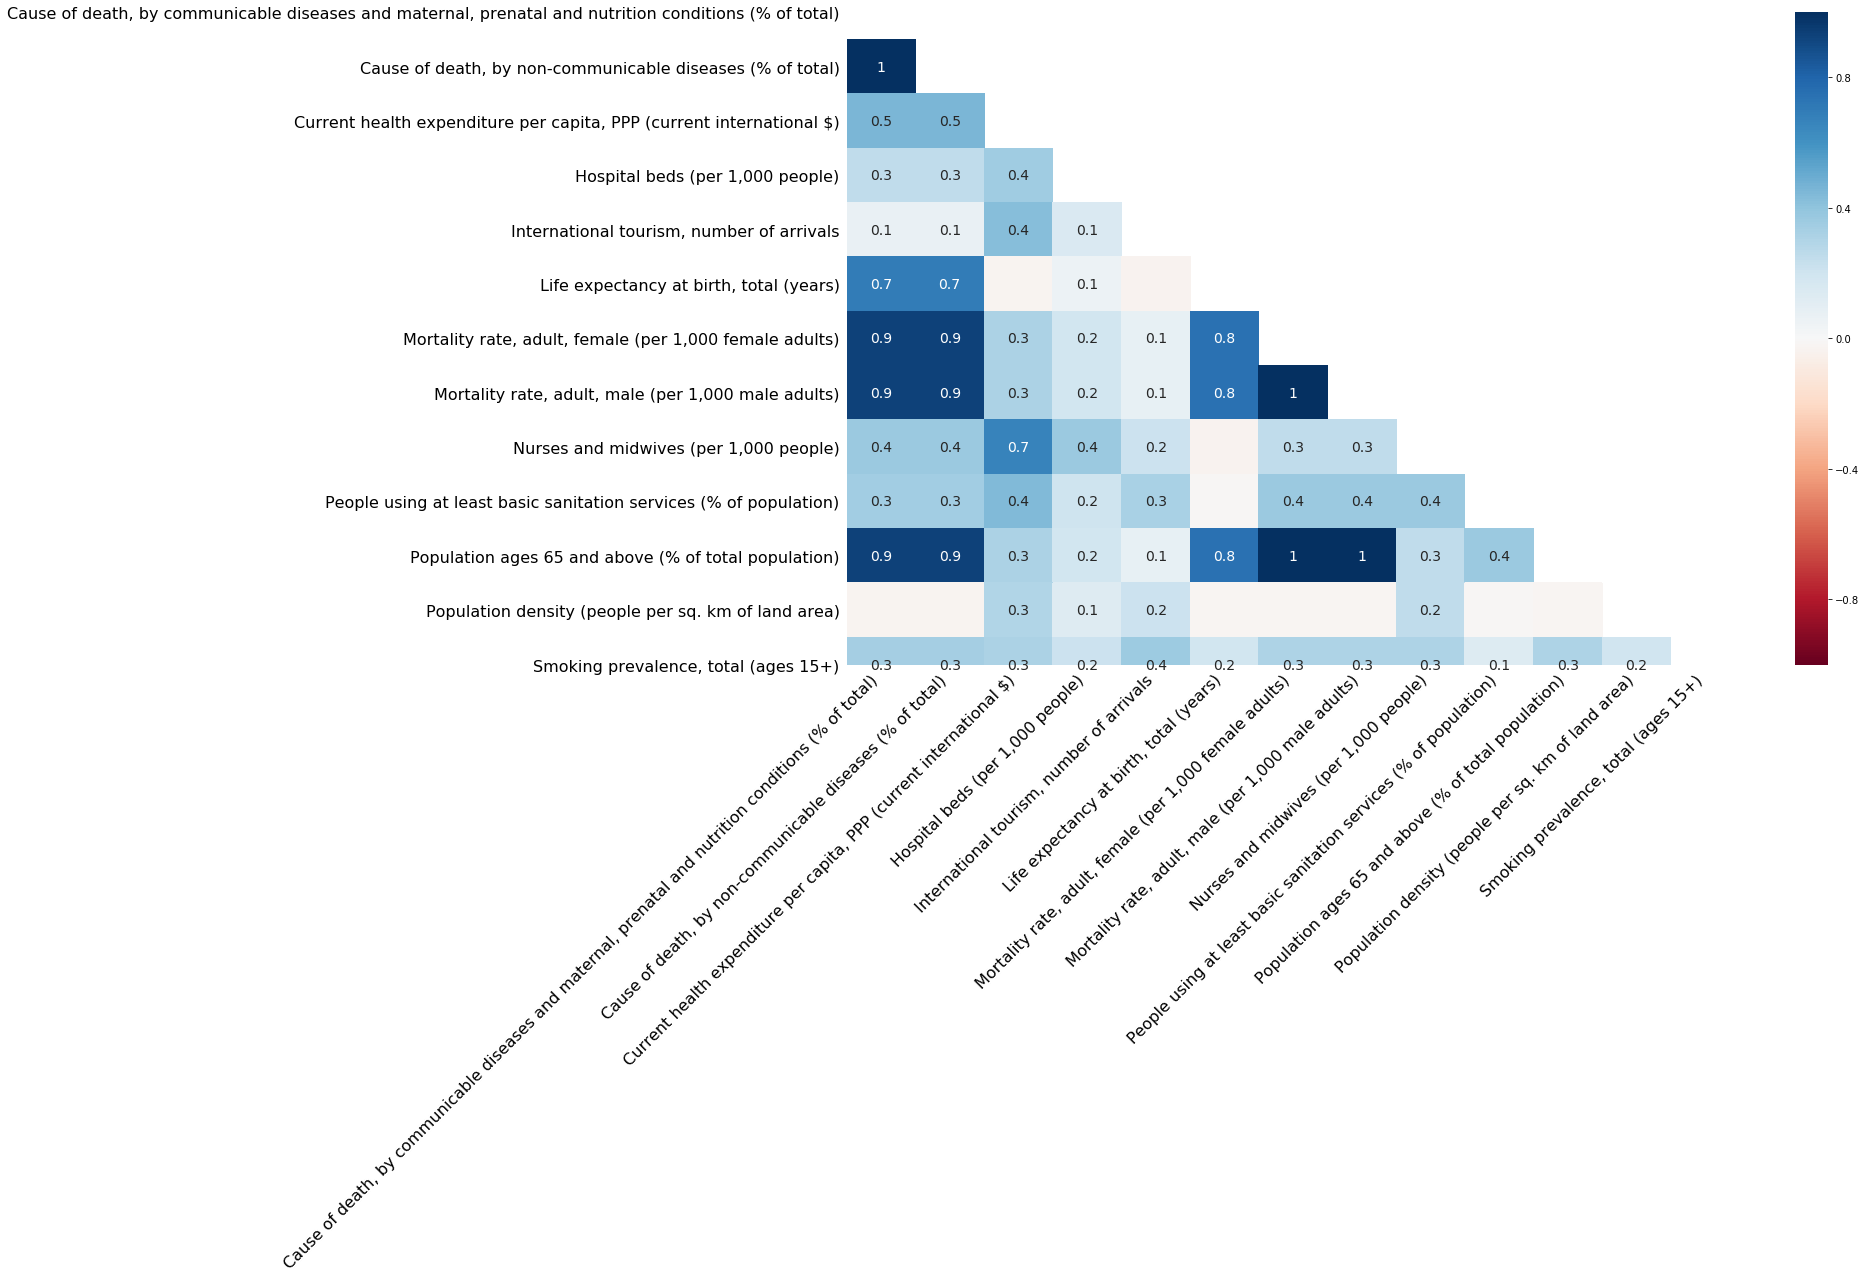

In [29]:
msno.heatmap(df_wdi)

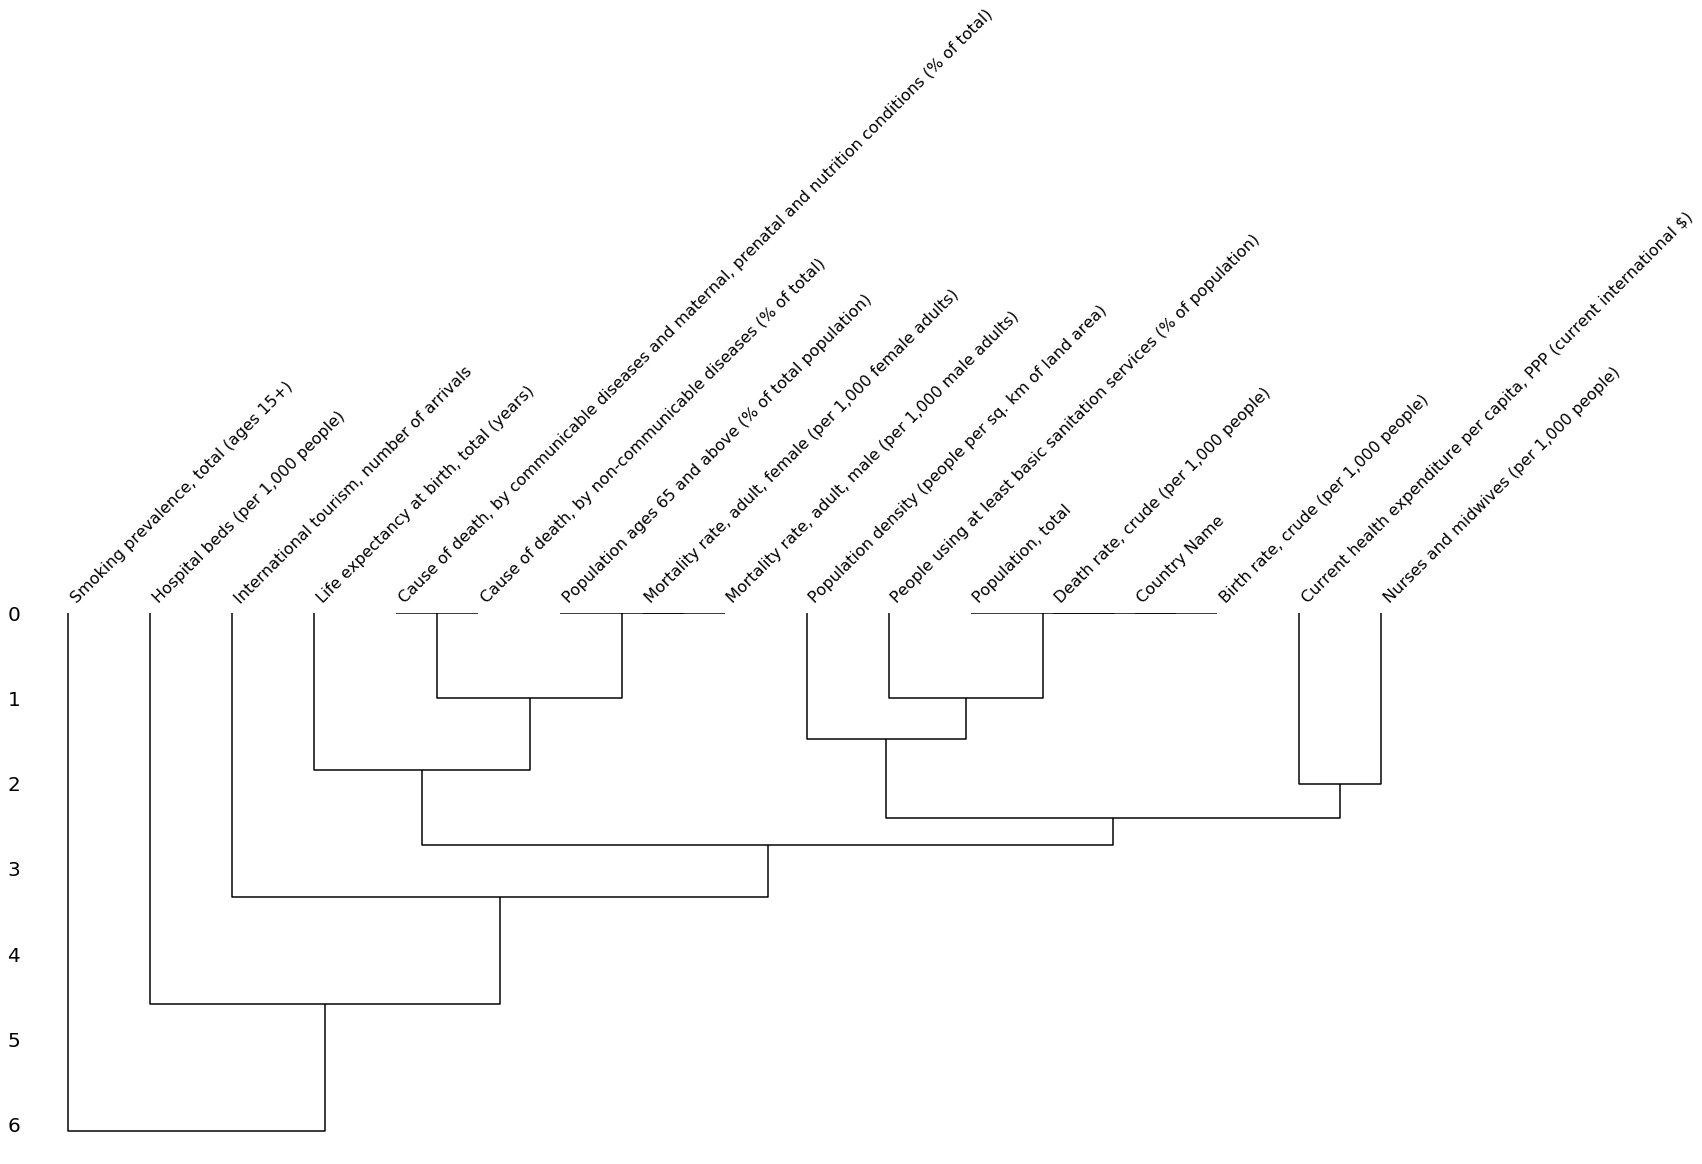

In [30]:
msno.dendrogram(df_wdi)

In [31]:
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
imp = imputer.fit_transform(df_wdi.drop(['Country Name'], 1))

In [32]:
len(imp[0])

16

In [33]:
df_wdi[df_wdi.columns[1:]] = imp
# df_wdi[df_wdi.columns[1:]]

In [34]:
df_wdi

,Country Name,"Birth rate, crude (per 1,000 people)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by non-communicable diseases (% of total)","Current health expenditure per capita, PPP (current international $)","Death rate, crude (per 1,000 people)","Hospital beds (per 1,000 people)","International tourism, number of arrivals","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Nurses and midwives (per 1,000 people)",People using at least basic sanitation services (% of population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),"Population, total","Smoking prevalence, total (ages 15+)"
0,Guatemala,24.912,25.1,59.2,462.405855,4.762,0.6,1.781000e+06,73.810000,110.078,209.134,0.9470,65.063135,4.812073,160.953779,17247807.0,11.053986
1,Bulgaria,9.000,2.2,95.2,1577.942762,15.500,6.8,9.273000e+06,74.812195,88.309,197.081,5.3029,86.003698,21.021914,64.703537,7024216.0,37.000000
2,Cameroon,35.900,53.9,35.2,169.288821,9.501,1.3,1.081000e+06,58.511000,317.369,340.930,0.9337,39.075550,2.728877,53.343989,25216237.0,12.638389
3,Saint Vincent and the Grenadines,14.403,13.4,81.0,409.140058,9.162,2.6,8.000000e+04,72.300000,125.864,179.467,2.5801,87.184345,9.589787,282.589744,110210.0,17.580640
4,Honduras,21.859,14.0,66.5,400.336410,4.428,0.7,8.510000e+05,74.898000,117.401,170.217,0.8815,81.251263,4.690618,85.687032,9587522.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Jamaica,16.286,11.2,80.0,535.664583,7.558,1.7,2.473000e+06,74.267000,98.180,161.893,1.1397,87.312600,8.796643,270.993075,2934855.0,16.800000
169,"Korea, South",7.000,10.1,79.8,2711.738257,5.600,11.5,1.534700e+07,82.626829,32.920,80.514,6.9735,100.000000,14.418556,529.652104,51635256.0,23.300000
170,Iceland,11.900,4.4,89.8,4245.108988,6.500,3.2,2.343800e+06,82.204878,38.181,65.669,15.6806,98.782168,14.795093,3.526923,353574.0,14.700000
171,Thailand,10.513,15.8,74.0,635.021796,7.559,2.1,3.817800e+07,76.683000,91.148,199.348,2.9647,98.750735,11.900893,135.897207,69428524.0,19.900000


In [35]:
temp = df_covid[df_covid['Date'] == max(df_covid['Date'].values)][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

In [36]:
master_df = df_wdi.rename(columns = {'Country Name':'Country/Region'}).merge(temp, on='Country/Region')

In [37]:
master_df['Active'] = master_df['Confirmed'] - (master_df['Recovered'] + master_df['Deaths'])

In [38]:
master_df.head()

,Country/Region,"Birth rate, crude (per 1,000 people)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by non-communicable diseases (% of total)","Current health expenditure per capita, PPP (current international $)","Death rate, crude (per 1,000 people)","Hospital beds (per 1,000 people)","International tourism, number of arrivals","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)",...,"Nurses and midwives (per 1,000 people)",People using at least basic sanitation services (% of population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),"Population, total","Smoking prevalence, total (ages 15+)",Confirmed,Deaths,Recovered,Active
0,Guatemala,24.912,25.1,59.2,462.405855,4.762,0.6,1781000.0,73.810000,110.078,...,0.9470,65.063135,4.812073,160.953779,17247807.0,11.053986,61,2,15,44
1,Bulgaria,9.000,2.2,95.2,1577.942762,15.500,6.8,9273000.0,74.812195,88.309,...,5.3029,86.003698,21.021914,64.703537,7024216.0,37.000000,531,20,37,474
2,Cameroon,35.900,53.9,35.2,169.288821,9.501,1.3,1081000.0,58.511000,317.369,...,0.9337,39.075550,2.728877,53.343989,25216237.0,12.638389,650,9,17,624
3,Saint Vincent and the Grenadines,14.403,13.4,81.0,409.140058,9.162,2.6,80000.0,72.300000,125.864,...,2.5801,87.184345,9.589787,282.589744,110210.0,17.580640,7,0,1,6
4,Honduras,21.859,14.0,66.5,400.336410,4.428,0.7,851000.0,74.898000,117.401,...,0.8815,81.251263,4.690618,85.687032,9587522.0,2.000000,268,22,6,240


In [39]:
plt.rcParams['figure.figsize'] = 11,11

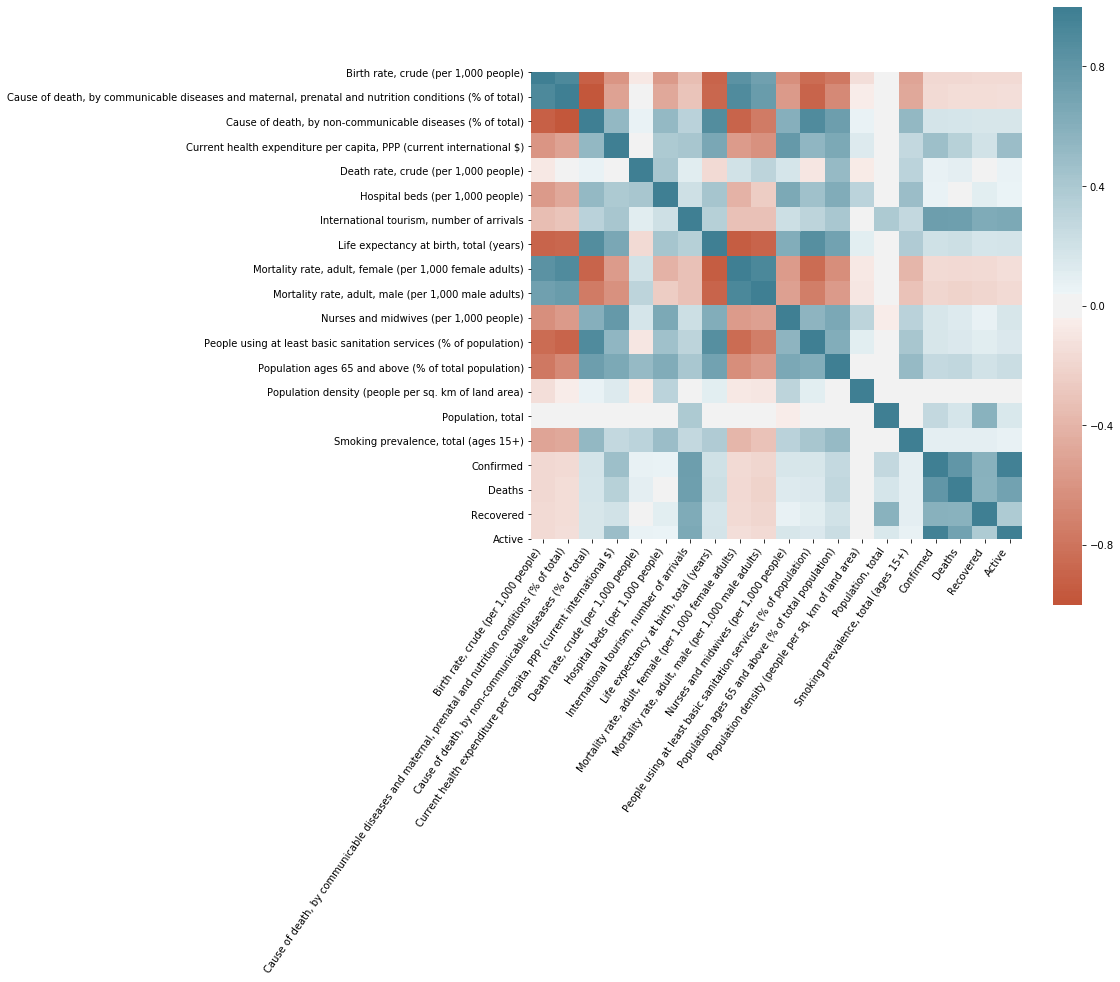

In [40]:
corr = master_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=55,
    horizontalalignment='right'
);

In [41]:
# corr['Confirmed'].sort_values()
corr['Deaths'].sort_values()

Mortality rate, adult, male (per 1,000 male adults)                                                     -0.215353
Birth rate, crude (per 1,000 people)                                                                    -0.187488
Mortality rate, adult, female (per 1,000 female adults)                                                 -0.175289
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)   -0.156240
Population density (people per sq. km of land area)                                                     -0.021038
Hospital beds (per 1,000 people)                                                                         0.028963
Smoking prevalence, total (ages 15+)                                                                     0.086177
Death rate, crude (per 1,000 people)                                                                     0.090666
Nurses and midwives (per 1,000 people)                                                  

In [42]:
# df_wdi.to_csv('world_development_index_clean.csv', index=False)